# 1 K-means

## 1.1 learning K-means

In [ ]:
%tensorflow_version 1.x 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

In [ ]:
# Distance function for K-means
def distanceFunc(X, MU):
    # Inputs
    # X: is an NxD matrix (N observations and D dimensions)
    # MU: is an KxD matrix (K means and D dimensions)
    # Outputs
    # pair_dist: is the squared pairwise distance matrix (NxK)
    # TODO
    X_expand = tf.expand_dims(X, 0)
    MU_expand = tf.expand_dims(MU, 1)
    distances = tf.reduce_sum(tf.square(tf.subtract(X_expand, MU_expand)), 2)
    return distances

In [ ]:
def k_mean(k, D):
    tf.set_random_seed(421)
    X = tf.placeholder(tf.float32, shape=[None, D])
    means = tf.Variable(tf.random.normal(shape=[k, D]), name="means")
    distance=distanceFunc(X, means)
    
    loss = tf.reduce_sum(tf.reduce_min(distance, axis=0))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99,epsilon=1e-5).minimize(loss)
    
    return X, means, distance, loss, optimizer


In [ ]:
def train_k_mean(trainData, k, iterations):
    D=train_data.shape[1]
    X, means, distance, loss, optimizer =k_mean(k, D)
    
    train_lossArr=[]
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
        sess.run(init)
        for i in range(iterations):
            train_loss, _ = sess.run([loss, optimizer], feed_dict={X: trainData})
            train_lossArr.append(train_loss)
            
        mu = means.eval()      
        cluster = sess.run(tf.argmin(distance, 0), feed_dict={X: trainData})
     
    percentages = np.zeros(k)
    str_percentages=[]
    for i in range(k):
        percentages[i] = np.sum(np.equal(i, cluster))*100.0/len(cluster)
        str_percentages.append(str(percentages[i])+'%')
        print("cluster", i)
        print("mean:", mu[i])
        print("percentage:", percentages[i],"%")
        print()


    print("Final loss:", train_lossArr[-1])
    scatter=plt.scatter(data[:, 0], data[:, 1], c=cluster, s=25, alpha=0.6)
    plt.plot(mu[:, 0], mu[:, 1], 'kx', markersize=10)
    plt.title(str(k)+ '-Means Clusters')
    plt.legend(handles=scatter.legend_elements()[0], labels=str_percentages)

    plt.figure()
    plt.title(str(k)+ '-Means Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(train_lossArr)
    
    plt.show()

### 1.plot for K=3

For the dataset data2D.npy, set K = 3 and find the K-means clusters. Include a plot of the loss vs the number of updates.

cluster 0
mean: [ 0.1218309 -1.523012 ]
percentage: 23.81 %

cluster 1
mean: [-1.0559207 -3.2431505]
percentage: 38.13 %

cluster 2
mean: [1.251768   0.24656224]
percentage: 38.06 %

Final loss: 5110.9453


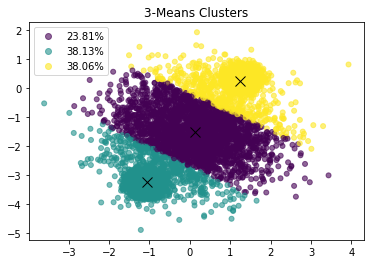

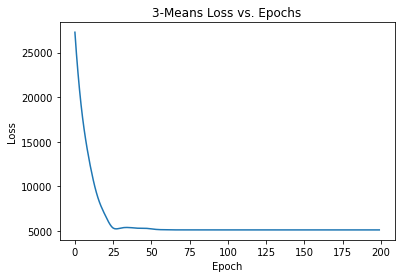

In [ ]:
# Loading data
data = np.load('data2D.npy')
#data = np.load('data100D.npy')
[num_pts, dim] = np.shape(data)
#train
train_k_mean(data, k=3, iterations=200)

### 2.1 plot for K = 1, 2, 3, 4, 5
Hold out 1/3 of the data for validation, and for each value of K = 1, 2, 3, 4, 5

In [ ]:
def k_mean_holdout(trainData, validData, k, iterations):
    D=trainData.shape[1]
    X, means, distance, loss, optimizer =k_mean(k, D)
    train_lossArry=[]
    loss_vals=[]
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
        sess.run(init)
        for i in range(iterations):
            loss_train, _ = sess.run([loss, optimizer], feed_dict={X: trainData})
            train_lossArry.append(loss_train)
            
            valid_loss = sess.run(loss, feed_dict={X: validData}) 
            loss_vals.append(valid_loss)

        mean_vals = means.eval()      
        membership_vals = sess.run(tf.argmin(distance, 0), feed_dict={X: trainData})
    
    percentages = np.zeros(k)
    str_percentages=[]
    for i in range(k):
        percentages[i] = np.sum(np.equal(i, membership_vals))*100.0/len(membership_vals)
        str_percentages.append(str(round(percentages[i],2))+'%')
        print("cluster", i)
        print("mean:", mean_vals[i])
        print("percentage:", percentages[i],"%")
        print()

    print('K = ', k)
    print("train loss:", train_lossArry[-1])
    print('validation loss: ', loss_vals[-1])

    scatter=plt.scatter(data[:, 0], data[:, 1], c=membership_vals, s=25, alpha=0.6)
    plt.plot(mean_vals[:, 0], mean_vals[:, 1], 'kx', markersize=10)
    plt.title(str(k)+ '-Means Clusters')
    plt.legend(handles=scatter.legend_elements()[0], labels=str_percentages)

    figure1=plt.figure()
    plt.title(str(k)+ '-Means Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(train_lossArry, label="training")
    plt.plot(loss_vals, label="validation")
    plt.legend(loc="best")
    figure1.text(.5, -0.05, "Validation loss: "+str(loss_vals[-1]), ha='center')
    
    plt.show()

In [ ]:
# Loading data
data = np.load('data2D.npy')
#data = np.load('data100D.npy')
[num_pts, dim] = np.shape(data)

is_valid = True

# For Validation set
if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:valid_batch]]
    data = data[rnd_idx[valid_batch:]]

cluster 0
mean: [ 0.11895686 -1.4880947 ]
percentage: 100.0 %

K =  1
train loss: 25588.998
validation loss:  12870.105


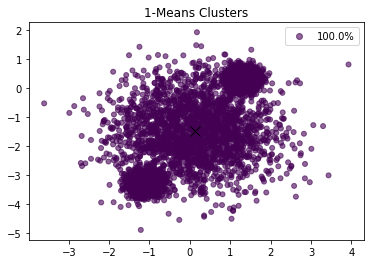

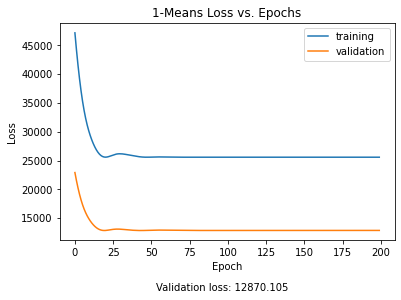

In [ ]:
k_mean_holdout(data,val_data, k=1, iterations=200)

cluster 0
mean: [ 1.0635519  -0.07827345]
percentage: 50.187490625468726 %

cluster 1
mean: [-0.832651 -2.908571]
percentage: 49.812509374531274 %

K =  2
train loss: 6243.3345
validation loss:  2960.685


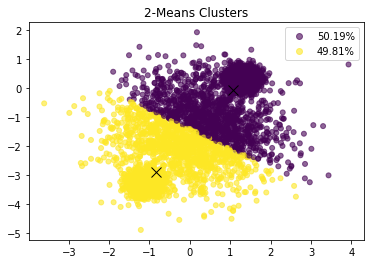

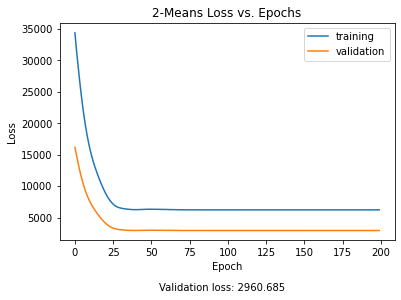

In [ ]:
k_mean_holdout(data, val_data, k=2, iterations=200)

cluster 0
mean: [-1.0691429 -3.2296078]
percentage: 37.51312434378281 %

cluster 1
mean: [ 0.18938017 -1.5553113 ]
percentage: 24.07379631018449 %

cluster 2
mean: [1.23512    0.25465533]
percentage: 38.413079346032696 %

K =  3
train loss: 3489.1755
validation loss:  1629.3058


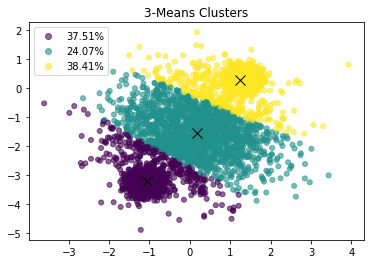

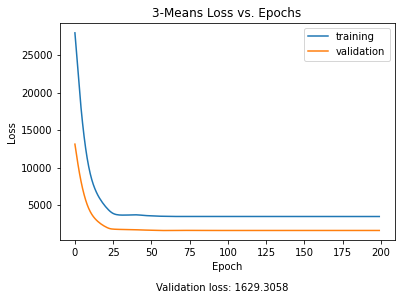

In [ ]:
k_mean_holdout(data,val_data, k=3, iterations=200)

cluster 0
mean: [-1.0644772 -3.2690444]
percentage: 36.23818809059547 %

cluster 1
mean: [-0.6636623 -1.0845337]
percentage: 12.31438428078596 %

cluster 2
mean: [ 0.8337308 -1.9499336]
percentage: 13.784310784460777 %

cluster 3
mean: [1.2519861  0.26261196]
percentage: 37.66311684415779 %

K =  4
train loss: 2320.1633
validation loss:  1054.5947


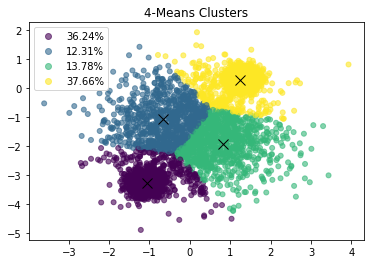

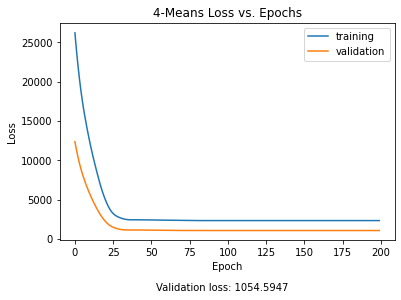

In [ ]:
k_mean_holdout(data, val_data,k=4, iterations=200)

cluster 0
mean: [-0.89119244 -1.6192633 ]
percentage: 8.204589770511474 %

cluster 1
mean: [-1.0667454 -3.2876823]
percentage: 35.53322333883306 %

cluster 2
mean: [1.2876923  0.28376138]
percentage: 36.103194840257984 %

cluster 3
mean: [ 0.919645  -2.0203807]
percentage: 12.029398530073497 %

cluster 4
mean: [-0.05413892 -0.5713099 ]
percentage: 8.129593520323985 %

K =  5
train loss: 1961.3007
validation loss:  918.95074


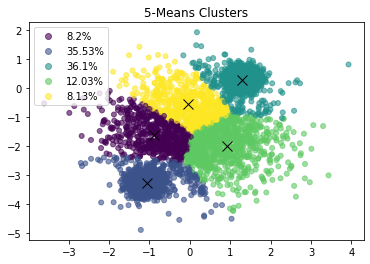

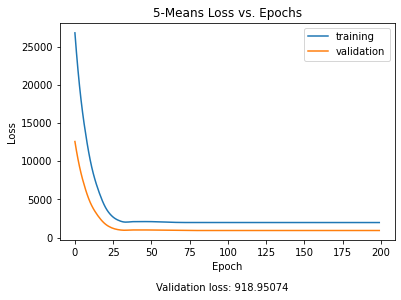

In [ ]:
k_mean_holdout(data,val_data, k=5, iterations=200)

### 2.2 Summary

**Answer:**
Based on the scatter plots, the best number of clusters is 3. Since for K=3, the percentage of points in each cluster is most equal, which is 37.51%, 24.07% and 38.41%. For K=4 and K=5, two cluster still have around 37 percentage, and the sum of percentage of the rest clusters around 25%. This indicates that one of the clusters at K=3 break into 2 or 3 clusters while the other two cluster remain the same. 

# 2.Mixtures of Gaussians

## 2.1 The Gaussian cluster mode

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import helper as hlp

In [ ]:
import tensorflow as tf


def reduce_logsumexp(input_tensor, reduction_indices=1, keep_dims=False):
  """Computes the sum of elements across dimensions of a tensor in log domain.

     It uses a similar API to tf.reduce_sum.

  Args:
    input_tensor: The tensor to reduce. Should have numeric type.
    reduction_indices: The dimensions to reduce. 
    keep_dims: If true, retains reduced dimensions with length 1.
  Returns:
    The reduced tensor.
  """
  max_input_tensor1 = tf.reduce_max(
      input_tensor, reduction_indices, keep_dims=keep_dims)
  max_input_tensor2 = max_input_tensor1
  if not keep_dims:
    max_input_tensor2 = tf.expand_dims(max_input_tensor2, reduction_indices)
  return tf.log(
      tf.reduce_sum(
          tf.exp(input_tensor - max_input_tensor2),
          reduction_indices,
          keep_dims=keep_dims)) + max_input_tensor1


def logsoftmax(input_tensor):
  """Computes normal softmax nonlinearity in log domain.

     It can be used to normalize log probability.
     The softmax is always computed along the second dimension of the input Tensor.     

  Args:
    input_tensor: Unnormalized log probability.
  Returns:
    normalized log probability.
  """
  return input_tensor - reduce_logsumexp(input_tensor, reduction_indices=0, keep_dims=True)


### 1.Implement `distanceFunc()` and `log_GaussPDF()`

Gaussian pdf simplifies to
${P_k}={1\over ({2 \pi \sigma_k^2})^{d/2}} exp {-||x-\mu_k||^2 \over {2\sigma_k^2}}$

Log Gaussian pdf
${log(P_k)= log {1\over ({2 \pi \sigma_k^2})^{d/2}} + {-||x-\mu_k||^2 \over {2\sigma_k^2}}}={log1-log {({2 \pi \sigma_k^2})^{d/2}} - {||x-\mu_k||^2 \over {2\sigma_k^2}}}={-log {({2 \pi \sigma_k^2})^{d/2}} - {||x-\mu_k||^2 \over {2\sigma_k^2}}}={-0.5*log {({2 \pi \sigma_k^2})^{d}} - {||x-\mu_k||^2 \over {2\sigma_k^2}}}$


In [ ]:
# Distance function for GMM
def distanceFunc(X, means):
    # Inputs
    # X: is an NxD matrix (N observations and D dimensions)
    # means: is an KxD matrix (K means and D dimensions)
    # Outputs
    # pair_dist: is the pairwise distance matrix (NxK)
    # TODO
    return tf.reduce_sum(tf.square(tf.expand_dims(X, 1) - means), 2)

In [ ]:
def log_GaussPDF(X, means, sigma):
    # Inputs
    # X: N X D
    # means: K X D
    # sigma: K X 1
    # Outputs:
    # log Gaussian PDF N X K
    # TODO
    D = tf.cast(tf.rank(X), tf.float32)
    distance = distanceFunc(X, means)
    sigma = tf.square(tf.transpose(sigma)) 

    return -0.5 * tf.log(((2 * np.pi)**D) * sigma) - distance /(2 * sigma)

### 2.Implement log_posterior()

$P(x, z=k)=P(z)P(x|z)$

$P(z=k|x)={{P(x, z=k)}\over {\Sigma_{j=1}^K P(x, z=j)}}$

$log(P(z|x))={log{{P(x|z)P(z)} \over {P(x)}}}={log(P(x|z))+ log(P(z))-log(P(x))}$

As we know $log(P(z))=log(\pi)$ ,and $log(P(x))=log(\Sigma_{k=1}^K \pi_k N(x_i;\mu_k,\sigma_k^2))=log(\Sigma_{k=1}^K  (log(P(x|z))+log(P(\pi))))$

Therefore,

$log(P(z|x))={log(P(x|z))+ log(\pi)-log(P(x))}={log(P(x|z))+ log(\pi)-log(\Sigma_{k=1}^K(log(P(x|z))+log(P(\pi))))}$

It is important to use the log-sum-exp function instead of using tf.reduce_sum since using log-domain computations is avoid underflow and overflow problems when very small or very large numbers are represented directly using limited-precision floating point numbers.




In [ ]:
def log_posterior(log_PDF, log_pi):
    # Input
    # log_PDF: log Gaussian PDF N X K
    # log_pi: K X 1
    # Outputs
    # log_post: N X K
    # TODO
    log_pi = tf.transpose(log_pi)
    return log_PDF + log_pi - reduce_logsumexp(log_PDF + log_pi, keep_dims=True)

## 2.2 Learning the MoG

In [ ]:
def GMM(K, D):
	tf.set_random_seed(421)
	data = tf.placeholder(tf.float32, shape=(None, D), name="trainData")
	means = tf.Variable(tf.random_normal(shape=[K, D], stddev=1.0), name="means")
	
	phi = tf.Variable(tf.random_normal(shape=[K, 1], stddev=1.0), name="Phi")
	psi = tf.Variable(tf.random_normal(shape=[K, 1], stddev=1.0), name="Psi")
	
	sigma = tf.sqrt(tf.exp(phi))
	psi_soft = logsoftmax(psi)
	prob = tf.exp(psi_soft)

	log_gauss = log_GaussPDF(data, means, sigma)
	
	loss = - tf.reduce_sum(reduce_logsumexp(log_gauss + tf.transpose(tf.log(prob)),1),axis=0) 
	best_cluster = tf.argmax(log_posterior(log_gauss, prob), axis=1)
	optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(loss)

	return data, means, prob, best_cluster, loss, optimizer, log_gauss

### 1.plot For K=3

In [ ]:
def train_GMM(trainingData, K, epochs):
    data, means, sigma, best_cluster, loss, optimizer, log_gauss = GMM(K, trainingData.shape[1])
    lossArr = []
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
      sess.run(init)
      for i in range(epochs):
          lossVal, _ =sess.run([loss, optimizer], feed_dict={data: trainingData})
          lossArr.append(lossVal)
    
      clusterCenter = means.eval()
      clusters = sess.run(best_cluster, feed_dict={data: trainingData})

    clusterAssignments = clusters.squeeze()
    percentages = np.zeros(K)
    str_percentages=[]
    for i in range(K):
        percentages[i] = np.sum(np.equal(i, clusterAssignments))*100.0/len(clusterAssignments)
        str_percentages.append(str(percentages[i])+'%')
        print("cluster", i)
        print("mean:", clusterCenter[i])
        print("percentage:", percentages[i],"%")
        print()

    print('k = ', K)
    print("Training loss:", lossArr[-1])
	
    scatter=plt.scatter(trainingData[:, 0], trainingData[:, 1], c=clusterAssignments, s=25, alpha=0.6)
    plt.plot(clusterCenter[:, 0], clusterCenter[:, 1], 'kx', markersize=10)
    plt.title(str(K)+ '-Means GMM Clusters')
    plt.legend(handles=scatter.legend_elements()[0], labels=str_percentages)
    
    plt.figure()
    plt.title(str(K)+ '-Means Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(lossArr)
    
    plt.show()

cluster 0
mean: [-1.1032728 -3.306908 ]
percentage: 33.84 %

cluster 1
mean: [ 0.1027257 -1.5245496]
percentage: 32.26 %

cluster 2
mean: [1.2966545  0.31388155]
percentage: 33.9 %

k =  3
Training loss: 17133.352


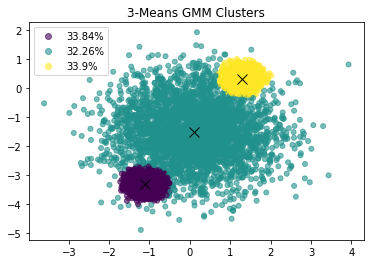

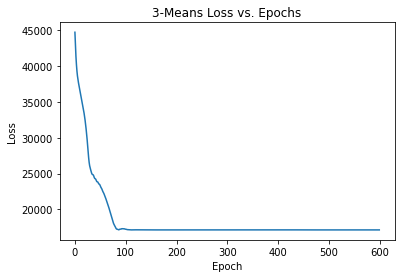

In [ ]:
# Loading data
#data = np.load('data100D.npy')
data = np.load('data2D.npy')
[num_pts, dim] = np.shape(data)
train_GMM(data, K=3, epochs=600)

### 2.1 plot For K=1,2,3,4,5 use data2D.npy

In [ ]:
def train_GMM_holdout(trainingData, validData, K, epochs):
    data, means, sigma, best_cluster, loss, optimizer, log_gauss = GMM(K, trainingData.shape[1])
    lossArr = []
    val_lossArr = []
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
      sess.run(init)
      for i in range(epochs):
          lossVal, _ =sess.run([loss, optimizer], feed_dict={data: trainingData})
          lossArr.append(lossVal)
          valid_loss = sess.run(loss, feed_dict={data: validData})
          val_lossArr.append(valid_loss)
    
      clusterCenter = means.eval()
      clusters = sess.run(best_cluster, feed_dict={data: trainingData})
    
    clusterAssignments = clusters.squeeze()
    percentages = np.zeros(K)
    str_percentages=[]
    for i in range(K):
        percentages[i] = np.sum(np.equal(i, clusterAssignments))*100.0/len(clusterAssignments)
        str_percentages.append(str(round(percentages[i],2))+'%')
        print("cluster", i)
        print("mean:", clusterCenter[i])
        print("percentage:", percentages[i],"%")
        print()

    print('K = ', K)
    print("Training loss:", lossArr[-1])
    print("Validation loss:", val_lossArr[-1])
	
    scatter=plt.scatter(trainingData[:, 0], trainingData[:, 1], c=clusterAssignments, s=25, alpha=0.6)
    plt.plot(clusterCenter[:, 0], clusterCenter[:, 1], 'kx', markersize=10)
    plt.title(str(K)+ '-Means GMM Clusters')
    plt.legend(handles=scatter.legend_elements()[0], labels=str_percentages)
    
    figure1=plt.figure()
    plt.title(str(K)+ '-Means Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(lossArr, label="training")
    plt.plot(val_lossArr, label="validation")
    plt.legend(loc='best')
    figure1.text(.5, -0.05, "Validation loss: "+str(val_lossArr[-1]), ha='center')

    plt.show()

In [ ]:
# Loading data
#data = np.load('data100D.npy')
data = np.load('data2D.npy')
[num_pts, dim] = np.shape(data)

is_valid = True

# For Validation set
if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:valid_batch]]
    data = data[rnd_idx[valid_batch:]]

cluster 0
mean: [ 0.11896902 -1.4881032 ]
percentage: 100.0 %

K =  1
Training loss: 23265.98
Validation loss: 11651.445


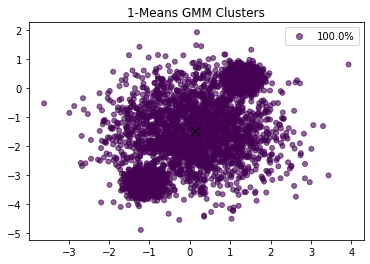

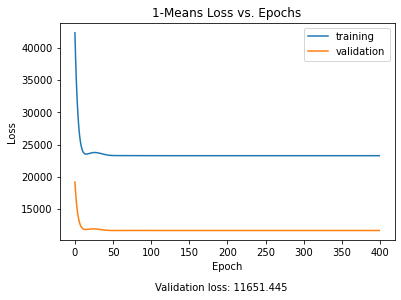

In [ ]:
train_GMM_holdout(data,val_data, K=1, epochs=400)

cluster 0
mean: [-0.49442485 -2.4247174 ]
percentage: 65.56172191390431 %

cluster 1
mean: [1.2941021  0.30625036]
percentage: 34.43827808609569 %

K =  2
Training loss: 16155.743
Validation loss: 7987.7886


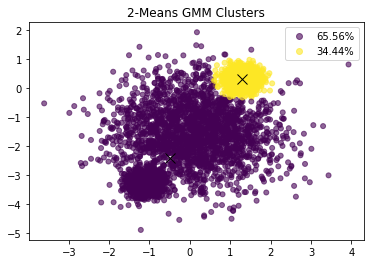

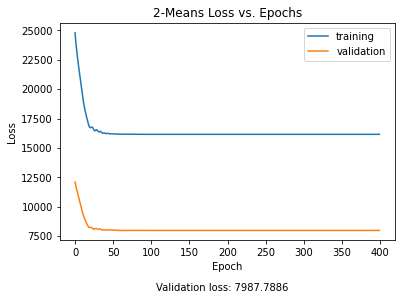

In [ ]:
train_GMM_holdout(data,val_data, K=2, epochs=400)

cluster 0
mean: [ 0.12765752 -1.5193099 ]
percentage: 32.818359082045895 %

cluster 1
mean: [-1.0993667 -3.3073108]
percentage: 33.16334183290835 %

cluster 2
mean: [1.2976078 0.310257 ]
percentage: 34.01829908504575 %

K =  3
Training loss: 11506.683
Validation loss: 5629.222


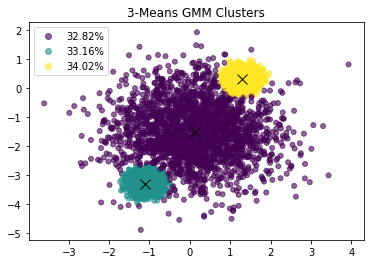

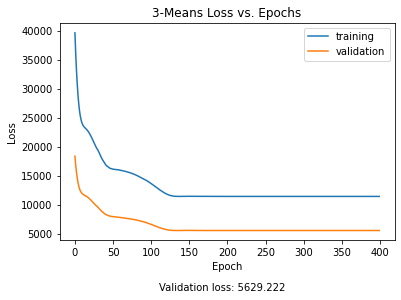

In [ ]:
train_GMM_holdout(data,val_data, K=3, epochs=400)

cluster 0
mean: [-1.1035069 -3.307199 ]
percentage: 33.178341082945856 %

cluster 1
mean: [-0.02044455 -1.2940421 ]
percentage: 8.309584520773962 %

cluster 2
mean: [1.2975088  0.31332502]
percentage: 34.01829908504575 %

cluster 3
mean: [ 0.16360423 -1.5772358 ]
percentage: 24.493775311234437 %

K =  4
Training loss: 11506.085
Validation loss: 5629.873


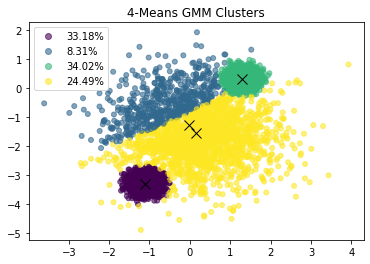

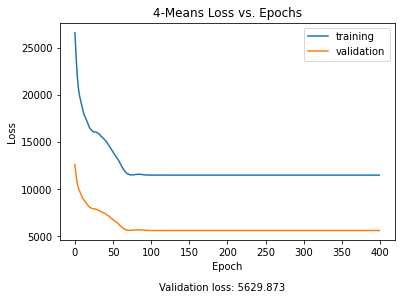

In [ ]:
train_GMM_holdout(data,val_data, K=4, epochs=400)

cluster 0
mean: [ 0.3581508 -1.6177703]
percentage: 17.054147292635367 %

cluster 1
mean: [1.2983919  0.30995166]
percentage: 33.55332233388331 %

cluster 2
mean: [-1.1036824 -3.3073187]
percentage: 33.133343332833356 %

cluster 3
mean: [-0.21047565 -1.4768875 ]
percentage: 11.819409029548522 %

cluster 4
mean: [0.2702512  0.24674052]
percentage: 4.439778011099445 %

K =  5
Training loss: 11502.482
Validation loss: 5629.6724


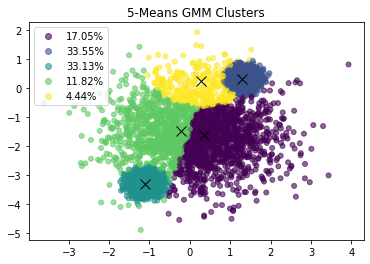

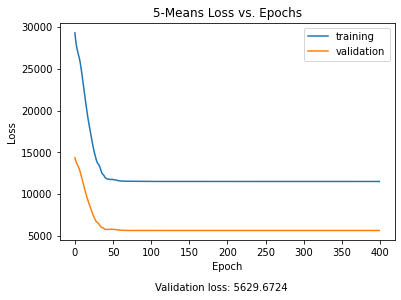

In [ ]:
train_GMM_holdout(data,val_data, K=5, epochs=400)

### 2.2 Summary

**Answer:**

Based on the validation loss, K=3 is the best value. The validation loss from K=1 to K=3 decreases dramatically, 11651.445 at K=1, 7987.7886 at K=2 and 5629.222 at K=3. After K=3, the validation loss changes slightly as the value of K increase, which remains around 5629.

### 3.1. K-mean For K=5,10,15,20,30 use data100D.npy

In [ ]:
def k_mean_holdout_loss(trainData, validData, k, iterations):
    D=trainData.shape[1]
    X, means, distance, loss, optimizer =k_mean(k, D)
    train_lossArry=[]
    loss_vals=[]
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
        sess.run(init)
        for i in range(iterations):
            loss_train, _ = sess.run([loss, optimizer], feed_dict={X: trainData})
            train_lossArry.append(loss_train)
            
            valid_loss = sess.run(loss, feed_dict={X: validData}) 
            loss_vals.append(valid_loss)

        mean_vals = means.eval()      
        membership_vals = sess.run(tf.argmin(distance, 0), feed_dict={X: trainData})
    
    percentages = np.zeros(k)
    str_percentages=[]
    print('K = ', k)
    for i in range(k):
        percentages[i] = np.sum(np.equal(i, membership_vals))*100.0/len(membership_vals)
        str_percentages.append(str(round(percentages[i],2))+'%')
        print("cluster", i)
        print("percentage:", percentages[i],"%")
        print()

    print("train loss:", train_lossArry[-1])
    print('validation loss: ', loss_vals[-1])


In [ ]:
# Loading data
data = np.load('data100D.npy')
#data = np.load('data2D.npy')
[num_pts, dim] = np.shape(data)

is_valid = True

# For Validation set
if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:valid_batch]]
    data = data[rnd_idx[valid_batch:]]

In [ ]:
k_mean_holdout_loss(data,val_data, k=5, iterations=400)

K =  5
cluster 0
percentage: 10.019499025048747 %

cluster 1
percentage: 20.038998050097494 %

cluster 2
percentage: 20.278986050697466 %

cluster 3
percentage: 29.308534573271338 %

cluster 4
percentage: 20.353982300884955 %

train loss: 143512.44
validation loss:  71795.02


In [ ]:
k_mean_holdout_loss(data,val_data, k=10, iterations=400)

K =  10
cluster 0
percentage: 0.0 %

cluster 1
percentage: 14.459277036148192 %

cluster 2
percentage: 0.0 %

cluster 3
percentage: 20.278986050697466 %

cluster 4
percentage: 20.353982300884955 %

cluster 5
percentage: 14.834258287085646 %

cluster 6
percentage: 0.0 %

cluster 7
percentage: 0.014999250037498125 %

cluster 8
percentage: 20.038998050097494 %

cluster 9
percentage: 10.019499025048747 %

train loss: 142263.05
validation loss:  71171.95


In [ ]:
k_mean_holdout_loss(data,val_data, k=15, iterations=400)

K =  15
cluster 0
percentage: 0.0 %

cluster 1
percentage: 10.019499025048747 %

cluster 2
percentage: 0.014999250037498125 %

cluster 3
percentage: 14.789260536973151 %

cluster 4
percentage: 0.0 %

cluster 5
percentage: 3.3298335083245836 %

cluster 6
percentage: 0.0 %

cluster 7
percentage: 20.038998050097494 %

cluster 8
percentage: 4.259787010649467 %

cluster 9
percentage: 4.169791510424479 %

cluster 10
percentage: 14.519274036298185 %

cluster 11
percentage: 4.289785510724464 %

cluster 12
percentage: 0.0 %

cluster 13
percentage: 4.214789260536973 %

cluster 14
percentage: 20.353982300884955 %

train loss: 138225.08
validation loss:  69640.05


In [ ]:
k_mean_holdout_loss(data,val_data, k=20, iterations=400)

K =  20
cluster 0
percentage: 0.0 %

cluster 1
percentage: 0.02999850007499625 %

cluster 2
percentage: 0.014999250037498125 %

cluster 3
percentage: 0.0 %

cluster 4
percentage: 0.0 %

cluster 5
percentage: 10.019499025048747 %

cluster 6
percentage: 3.704814759262037 %

cluster 7
percentage: 2.789860506974651 %

cluster 8
percentage: 2.9398530073496327 %

cluster 9
percentage: 0.0 %

cluster 10
percentage: 3.944802759862007 %

cluster 11
percentage: 0.0 %

cluster 12
percentage: 29.29353532323384 %

cluster 13
percentage: 0.0 %

cluster 14
percentage: 3.4048297585120744 %

cluster 15
percentage: 0.014999250037498125 %

cluster 16
percentage: 0.0 %

cluster 17
percentage: 20.353982300884955 %

cluster 18
percentage: 20.023998800059996 %

cluster 19
percentage: 3.464826758662067 %

train loss: 138983.03
validation loss:  70047.625


In [ ]:
k_mean_holdout_loss(data,val_data, k=30, iterations=400)

K =  30
cluster 0
percentage: 2.63986800659967 %

cluster 1
percentage: 5.5047247637618115 %

cluster 2
percentage: 0.0 %

cluster 3
percentage: 5.849707514624269 %

cluster 4
percentage: 0.0 %

cluster 5
percentage: 0.04499775011249438 %

cluster 6
percentage: 0.0 %

cluster 7
percentage: 3.014849257537123 %

cluster 8
percentage: 0.23998800059997 %

cluster 9
percentage: 10.019499025048747 %

cluster 10
percentage: 0.0 %

cluster 11
percentage: 0.0 %

cluster 12
percentage: 6.1946902654867255 %

cluster 13
percentage: 5.489725513724314 %

cluster 14
percentage: 3.164841757912104 %

cluster 15
percentage: 0.02999850007499625 %

cluster 16
percentage: 0.0 %

cluster 17
percentage: 0.0 %

cluster 18
percentage: 20.353982300884955 %

cluster 19
percentage: 3.134843257837108 %

cluster 20
percentage: 6.23968801559922 %

cluster 21
percentage: 0.0 %

cluster 22
percentage: 3.209839508024599 %

cluster 23
percentage: 0.0 %

cluster 24
percentage: 2.414879256037198 %

cluster 25
percentage: 

### 3.2. MoG For K=5,10,15,20,30 use data100D.npy

In [ ]:
def train_GMM_holdout_loss(trainingData, validData, K, epochs):
    X, means, sigma, best_cluster, loss, optimizer, log_gauss = GMM(K, trainingData.shape[1])
    lossArr = []
    val_lossArr = []
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
      sess.run(init)
      for i in range(epochs):
          lossVal, _ =sess.run([loss, optimizer], feed_dict={X: trainingData})
          lossArr.append(lossVal)
          valid_loss = sess.run(loss, feed_dict={X: validData})
          val_lossArr.append(valid_loss)
    
      clusterCenter = means.eval()
      clusters = sess.run(best_cluster, feed_dict={X: trainingData})
    
    clusterAssignments = clusters.squeeze()
    percentages = np.zeros(K)
    str_percentages=[]
    print('K = ', K)
    for i in range(K):
        percentages[i] = np.sum(np.equal(i, clusterAssignments))*100.0/len(clusterAssignments)
        str_percentages.append(str(round(percentages[i],2))+'%')
        print("cluster", i)
        print("percentage:", percentages[i],"%")
        print()

    
    print("Training loss:", lossArr[-1])
    print("Validation loss:", val_lossArr[-1])
	
   

In [ ]:
# Loading data
data = np.load('data100D.npy')
#data = np.load('data2D.npy')
[num_pts, dim] = np.shape(data)

is_valid = True

# For Validation set
if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:valid_batch]]
    data = data[rnd_idx[valid_batch:]]

In [ ]:
train_GMM_holdout_loss(data, val_data, K=5, epochs=400)

K =  5
cluster 0
percentage: 0.0 %

cluster 1
percentage: 100.0 %

cluster 2
percentage: 0.0 %

cluster 3
percentage: 0.0 %

cluster 4
percentage: 0.0 %

Training loss: 30945.596
Validation loss: 15462.136


In [ ]:
train_GMM_holdout_loss(data, val_data, K=10, epochs=400)

K =  10
cluster 0
percentage: 0.0 %

cluster 1
percentage: 100.0 %

cluster 2
percentage: 0.0 %

cluster 3
percentage: 0.0 %

cluster 4
percentage: 0.0 %

cluster 5
percentage: 0.0 %

cluster 6
percentage: 0.0 %

cluster 7
percentage: 0.0 %

cluster 8
percentage: 0.0 %

cluster 9
percentage: 0.0 %

Training loss: 30946.33
Validation loss: 15462.497


In [ ]:
train_GMM_holdout_loss(data, val_data, K=15, epochs=400)

K =  15
cluster 0
percentage: 0.0 %

cluster 1
percentage: 0.0 %

cluster 2
percentage: 0.0 %

cluster 3
percentage: 0.0 %

cluster 4
percentage: 0.0 %

cluster 5
percentage: 0.0 %

cluster 6
percentage: 0.0 %

cluster 7
percentage: 100.0 %

cluster 8
percentage: 0.0 %

cluster 9
percentage: 0.0 %

cluster 10
percentage: 0.0 %

cluster 11
percentage: 0.0 %

cluster 12
percentage: 0.0 %

cluster 13
percentage: 0.0 %

cluster 14
percentage: 0.0 %

Training loss: 30945.838
Validation loss: 15462.239


In [ ]:
train_GMM_holdout_loss(data, val_data, K=20, epochs=400)

K =  20
cluster 0
percentage: 0.0 %

cluster 1
percentage: 100.0 %

cluster 2
percentage: 0.0 %

cluster 3
percentage: 0.0 %

cluster 4
percentage: 0.0 %

cluster 5
percentage: 0.0 %

cluster 6
percentage: 0.0 %

cluster 7
percentage: 0.0 %

cluster 8
percentage: 0.0 %

cluster 9
percentage: 0.0 %

cluster 10
percentage: 0.0 %

cluster 11
percentage: 0.0 %

cluster 12
percentage: 0.0 %

cluster 13
percentage: 0.0 %

cluster 14
percentage: 0.0 %

cluster 15
percentage: 0.0 %

cluster 16
percentage: 0.0 %

cluster 17
percentage: 0.0 %

cluster 18
percentage: 0.0 %

cluster 19
percentage: 0.0 %

Training loss: 30953.162
Validation loss: 15465.893


In [ ]:
train_GMM_holdout_loss(data, val_data, K=30, epochs=400)

K =  30
cluster 0
percentage: 0.0 %

cluster 1
percentage: 0.0 %

cluster 2
percentage: 0.0 %

cluster 3
percentage: 0.0 %

cluster 4
percentage: 0.0 %

cluster 5
percentage: 0.0 %

cluster 6
percentage: 0.0 %

cluster 7
percentage: 100.0 %

cluster 8
percentage: 0.0 %

cluster 9
percentage: 0.0 %

cluster 10
percentage: 0.0 %

cluster 11
percentage: 0.0 %

cluster 12
percentage: 0.0 %

cluster 13
percentage: 0.0 %

cluster 14
percentage: 0.0 %

cluster 15
percentage: 0.0 %

cluster 16
percentage: 0.0 %

cluster 17
percentage: 0.0 %

cluster 18
percentage: 0.0 %

cluster 19
percentage: 0.0 %

cluster 20
percentage: 0.0 %

cluster 21
percentage: 0.0 %

cluster 22
percentage: 0.0 %

cluster 23
percentage: 0.0 %

cluster 24
percentage: 0.0 %

cluster 25
percentage: 0.0 %

cluster 26
percentage: 0.0 %

cluster 27
percentage: 0.0 %

cluster 28
percentage: 0.0 %

cluster 29
percentage: 0.0 %

Training loss: 30948.871
Validation loss: 15463.758


### 3.3 Summary

**Table: Validation loss of both the K-means and the MoG on data100D.npy for K = {5, 10, 15, 20, 30}**

  \begin{array}{|c|c|c|}\hline\\ \\
  \mathcal{} K & \mathcal{K-mean} & \mathcal{GMM} \\ \hline\\ \\
  5 & 71795.02 & 15462.136 \\ \hline\\ \\
  10 & 71171.95 & 15462.497 \\ \hline\\ \\
  15 & 69640.05 & 15462.239 \\ \hline\\ \\
  20 & 70047.625 & 15465.893  \\ \hline\\ \\
  30 & 68654.88 & 15463.758) \\ \hline
  \end{array}

**Answer:**

By looking at the validation loss of K-mean and MoG, I think the clusters are between 10 and 15. From the table above, the validation loss for GMM still around 15462 which is stable. For K-mean, we can see the validation loss from K=5 to K=15 shows a decreasing trend. From K=15 to K=20, both  validation loss for K-mean and GMM has increase a little, which might be an overfitting. Therefore, the  number of clusters that exists in this dataset is between 10 and 15.